# Wave kinematic

The wave kinematic module allows to compute the incident (undisturbed) wave kinematic anywhere in the fluid. The main wave kinematic models avaible in Snoopy are : 

* FirstOrderKinematic : Linear model
* Wheeler1st : Linear model, with wheeler stretching used to get velocity in crests.
* DeltaStretching
* SecondOrderKinematic
* SecondOrderKinematic21

The above classes are derived from a same mother class, and hence have the same API. (i.e. whatever model you are using, the way to call the function is the same)

In [1]:
import numpy as np
from Snoopy import Spectral as sp
from Snoopy import WaveKinematic as wk
from matplotlib import pyplot as plt
from IPython.display import Image

**Create the discretize wave spectrum**

In [2]:
hs, tp = 5.0 , 10.0
ss = sp.SeaState(sp.Jonswap(hs = hs , tp = tp, gamma=1.0 , heading = 0.0))
wif = sp.Wif( ss, nbSeed = 200 )

**Construct the WaveKinematic object from a wif**

In [3]:
waveKin = wk.Wheeler1st( wif )

**Wave elevation time series can be retrieved with getElevation_SE:**

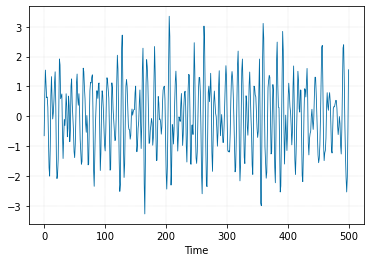

In [8]:
eta = waveKin.getElevation_SE(time = np.arange(0.0 , 500 , 1.0) , x = 0.0 , y = 0.0 ).plot();

**Wave velocities time series can be retrieved with getVelocity_DF:**

In [9]:
waveKin.getVelocity_DF( time = np.arange(0.0 , 500 , 1.0) , x = 0.0 , y = 0.0 , z = 0.0).plot();

**Animation**

In [6]:
plt.ioff()
a = waveKin.animate( time_range = np.arange(0.0 , tp*5 , tp/10.),
                     x_range = np.arange( 0.0, 3 * sp.t2l(tp), sp.t2l(tp) / 50), 
                     z_range = np.arange(-8, 5., 1.0));
plt.ion()
a.save("wave_anim_irreg.gif")
Image(url="wave_anim_irreg.gif", width = 500)